In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, binom
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.pyplot as plot
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
from statsmodels.stats.power import ttest_power
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import sys
import pylab as pl
import seaborn as sns


## Q1: Import and store the data in a data frame. (2.5 points)

In [25]:
col_names = ['City1', 'City2', 'AverageFare', 'Distance', 'AvgWeeklyPassg', 'MktLeadingAirline','Mkt_share', 'AvgFare','Lowprice airline', 'marketshare', 'price']
air = pd.read_fwf('http://users.stat.ufl.edu/~winner/data/airq402.dat', names=col_names)
air


,City1,City2,AverageFare,Distance,AvgWeeklyPassg,MktLeadingAirline,Mkt_share,AvgFare,Lowprice airline,marketshare,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


## Q2: Remove the outliers from the data (5 points)


In [26]:
air.head()
print('Shape of Dataset Before removing the outliers:',air.shape)

numeric_cols = air.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    sorted_col = air.sort_values([col])
    q1, q3= np.percentile(sorted_col[col],[25,75])
    print(q1,q3)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    air = air.loc[(air[col] > lower_bound) & (air[col] < upper_bound)]

print('After Removal of outliers:',air.shape)

Shape of Dataset Before removing the outliers: (1000, 11)
125.975 197.39249999999998
550.0 1399.0
256.95 768.04
46.7275 74.4725
126.165 202.805
13.06 52.98
115.84 167.81
After Removal of outliers: (877, 11)


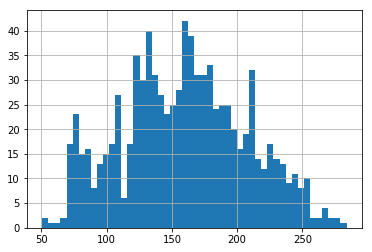

In [27]:
# Histogram to find the ourliers
air.AverageFare.hist(bins=50) 

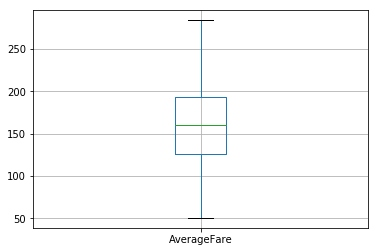

In [28]:
# Boxplot to find the ourliers
air.boxplot(column='AverageFare')

In [29]:
Q1 = air['AverageFare'].quantile(0.25)
Q3 = air['AverageFare'].quantile(0.75)
IQR = Q1-Q3

In [30]:
air[air.AverageFare > Q3 + 1.5*IQR]

,City1,City2,AverageFare,Distance,AvgWeeklyPassg,MktLeadingAirline,Mkt_share,AvgFare,Lowprice airline,marketshare,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78
10,ABQ,ATL,212.49,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


## Q3: Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [31]:

#features = ['City1','City2', 'Distance', 'AvgWeeklyPassg', 'MktLeadingAirline','Mkt share', 'Avg Fare','Low price airline', 'market share', 'price']
features = ['Distance', 'price','AvgWeeklyPassg', 'Mkt_share', 'AvgFare']

#Independent Variable 
y = air['AverageFare']

#Dependent Variable 
x = air[features]
print(x)
print(y)

     Distance   price  AvgWeeklyPassg  Mkt_share  AvgFare
0         528  111.03          424.56      70.19   111.03
1         860  118.94          276.84      75.10   123.09
2         852  167.12          215.76      78.89   223.98
3         288   68.86          606.84      96.97    68.86
4         723  145.42          313.04      39.79   161.36
5        1204  127.69          199.02      40.68   137.97
6        2237  148.59          237.17      59.94   148.59
7        2467  174.00          191.95      17.89   205.06
8        1073  127.69          550.54      76.84   127.69
9        1130  124.78          202.93      35.40   132.91
10       1269  200.93          198.80      68.39   226.79
11       1670  161.39          312.39      49.16   180.49
12       1121  163.22          364.78      45.94   174.62
13        580  117.20          839.78      71.91   117.20
14        349  149.41          308.26      59.55   181.34
15        767  152.03          372.93      50.48   152.03
16        487 

In [32]:
air.isnull().sum()

City1                0
City2                0
AverageFare          0
Distance             0
AvgWeeklyPassg       0
MktLeadingAirline    0
Mkt_share            0
AvgFare              0
Lowprice airline     0
marketshare          0
price                0
dtype: int64

## Q4: Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [33]:
air.corr()


,AverageFare,Distance,AvgWeeklyPassg,Mkt_share,AvgFare,marketshare,price
AverageFare,1.000000,0.512280,-0.194769,-0.202205,0.979853,-0.498025,0.837329
Distance,0.512280,1.000000,-0.123024,-0.546091,0.480295,-0.361306,0.531995
AvgWeeklyPassg,-0.194769,-0.123024,1.000000,0.018146,-0.160751,0.074210,-0.206307
Mkt_share,-0.202205,-0.546091,0.018146,1.000000,-0.188915,0.280194,-0.309026
AvgFare,0.979853,0.480295,-0.160751,-0.188915,1.000000,-0.522616,0.790611
marketshare,-0.498025,-0.361306,0.074210,0.280194,-0.522616,1.000000,-0.261714
price,0.837329,0.531995,-0.206307,-0.309026,0.790611,-0.261714,1.000000


In [34]:
air.columns

Index(['City1', 'City2', 'AverageFare', 'Distance', 'AvgWeeklyPassg',
       'MktLeadingAirline', 'Mkt_share', 'AvgFare', 'Lowprice airline',
       'marketshare', 'price'],
      dtype='object')

In [23]:
air.head()

,City1,City2,AverageFare,Distance,MktLeadingAirline,AvgFare,Lowprice airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42


In [35]:
air = air.drop(['AvgWeeklyPassg','Mkt_share','marketshare'], axis=1)

In [36]:
air.head()

,City1,City2,AverageFare,Distance,MktLeadingAirline,AvgFare,Lowprice airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42


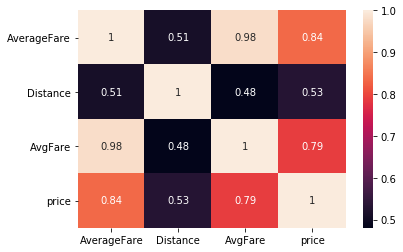

In [37]:
sns.heatmap(air.corr(), annot=True)
plot.show()

## Q5: Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

C:\Users\Aaryan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


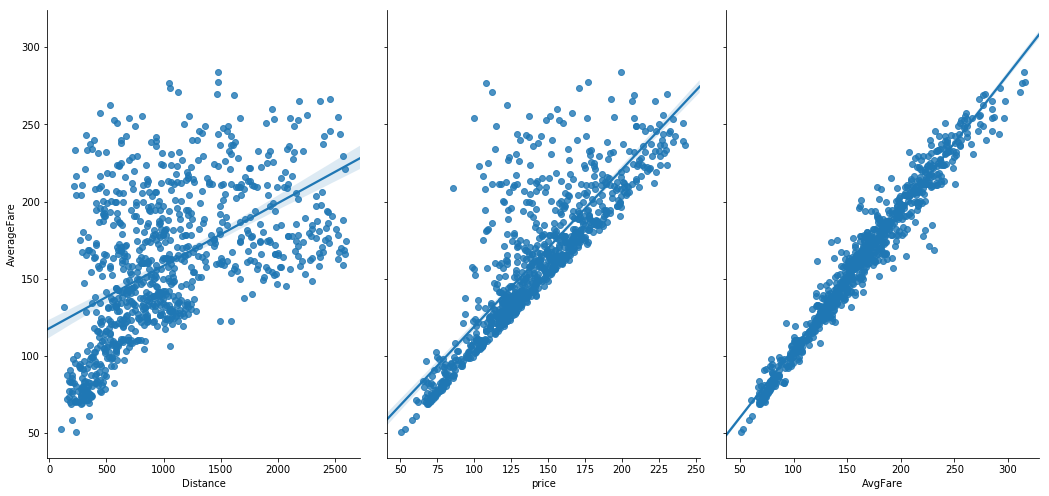

In [40]:

sns.pairplot(air,x_vars=['Distance', 'price', 'AvgFare'],y_vars=['AverageFare'],kind='reg',size=7,aspect=0.7)


## Q6: Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)


In [41]:
# Dividing data for training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10)

In [42]:
#Fit Multiple linear Regression Model
initfit=LinearRegression()
model = initfit.fit(x_train,y_train)
pred = model.predict(x_test)
print('LinearRegression Values:', model)
print('Predicted data for test:', pred)

LinearRegression Values: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Predicted data for test: [242.21275476 159.72849545 101.18581349 128.850907   131.96627668
 163.14404146 111.985582   184.49710164 158.64661352 149.78625003
 143.29090878 174.13561392 220.15549156 133.01219368 140.88598816
 147.41615285 157.48324388 127.23743597 205.01282277 112.17756317
 153.7802218  155.67314875 183.54098658 223.99380191 214.1220871
 103.3786025  222.15930083 151.20015505 169.5058841  133.80072522
 179.44211617 188.99657576 134.70628565 161.07489225 250.90446391
 144.90686963  70.8356072   57.54399679 136.87134053 116.36268644
  82.08202792 106.0742243   76.64489633 184.03443445 117.93914145
 156.74359014 106.6275044  129.54375819  62.21955403 209.55227913
 170.1456675  107.20377579 120.9554054  157.82162326 125.41118076
 250.28406021 216.15604117 250.43906296 210.88307084 187.90310951
 173.30720559 187.66091112  84.39263937 131.24404035 156.10089248
  74

## Q7: Print the coefficients & intercepts of the linear regression model (5 points)

In [43]:
print('Coefficients:',model.coef_)
print('Intercepts',model.intercept_)

Coefficients: [ 0.00311455  0.18974749 -0.00365479  0.06002375  0.75915686]
Intercepts 5.049743288985184


## Q8: Print the accuracy of the overall model (2.5 points)

In [44]:
#Performance of overall model
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, pred))
print(metrics.mean_squared_error(y_test, pred))
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))


5.798607289928332
75.41022493248794
8.683906087267868
